In [1]:
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
from sklearn.model_selection import train_test_split

%cd grape/

# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

# !pip3 install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
from functions import div, plog, psqrt, exp
from functions import add, sub, mul, pdiv, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal
import algorithms

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools

/Users/nutsa/Desktop/RS-with-GE/grape


In [38]:
ratings_1_2 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_1_2.csv')
ratings_3_5 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_3_5.csv')
ratings_6_9 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_6_9.csv')
ratings_10_13 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_10_13.csv')
ratings_14_19 = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/ratings/data/ratings_14_19.csv')

In [39]:
ratings = ratings_1_2.copy(deep='True')

for col in ratings_3_5.columns: 
  ratings[col] = ratings_3_5[col]

for col in ratings_6_9.columns: 
  ratings[col] = ratings_6_9[col]

for col in ratings_10_13.columns: 
  ratings[col] = ratings_10_13[col]

for col in ratings_14_19.columns: 
  ratings[col] = ratings_14_19[col]

In [40]:
ratings.head()

,user_id,movie_id,rating,CBF,CF,is_favourite_genre,ML_rating,ML_votes,age_at_rating,age_at_release,born_before,gender,imdb_rating,imdb_votes,is_adult,runtime_minutes,is_english,budget,popularity,TMDB_rating,TMDB_votes,revenue
0,1,1193,5,0,4,1,4,1725,1,-24,0,1,8,975363,0,133,1,3000000,3000000,8,8435,108981275
1,1,661,3,0,3,1,3,525,1,-3,0,1,6,65304,0,79,1,38000000,38000000,6,1035,28946127
2,1,914,3,0,4,0,4,636,1,-35,0,1,7,93493,0,170,1,17000000,17000000,7,988,72661442
3,1,3408,4,0,4,1,3,1315,1,1,1,1,7,191717,0,131,1,52000000,52000000,7,2451,256271286
4,1,2355,5,0,4,1,3,1703,1,-1,0,1,7,283979,0,95,1,120000000,120000000,7,7552,363258859


In [32]:
ratings.shape

(1000209, 22)

In [33]:
y_col_name = 'rating'

for column in ratings.columns: 
  ratings = ratings.astype({column: 'float'})

ratings = ratings.astype({y_col_name: 'int'})

ratings.dtypes

user_id               float64
movie_id              float64
rating                  int64
CBF                   float64
CF                    float64
is_favourite_genre    float64
ML_rating             float64
ML_votes              float64
age_at_rating         float64
age_at_release        float64
born_before           float64
gender                float64
imdb_rating           float64
imdb_votes            float64
is_adult              float64
runtime_minutes       float64
is_english            float64
budget                float64
popularity            float64
TMDB_rating           float64
TMDB_votes            float64
revenue               float64
dtype: object

In [6]:
ratings.columns

Index(['user_id', 'movie_id', 'rating', 'CBF', 'CF', 'is_favourite_genre',
       'ML_rating', 'ML_votes', 'age_at_rating', 'age_at_release',
       'born_before', 'gender', 'imdb_rating', 'imdb_votes', 'is_adult',
       'runtime_minutes', 'is_english', 'budget', 'popularity', 'TMDB_rating',
       'TMDB_votes', 'revenue'],
      dtype='object')

In [34]:
ratings = ratings.drop(columns=['user_id', 'movie_id'])

In [35]:
columns = ['CBF', 'CF', 'is_favourite_genre',
       'ML_rating', 'ML_votes', 'age_at_rating', 'age_at_release',
       'born_before', 'gender', 'imdb_rating', 'imdb_votes', 'is_adult',
       'runtime_minutes', 'is_english', 'budget', 'popularity', 'TMDB_rating',
       'TMDB_votes', 'revenue'] 

index = 1
for col in columns: 
  new_name = 'x' + str(index)
  ratings = ratings.rename(columns={col: 'x' + str(index)})
  print(col + ' : ' + new_name)
  index += 1

ratings = ratings.rename(columns={'rating': 'y'})

CBF : x1
CF : x2
is_favourite_genre : x3
ML_rating : x4
ML_votes : x5
age_at_rating : x6
age_at_release : x7
born_before : x8
gender : x9
imdb_rating : x10
imdb_votes : x11
is_adult : x12
runtime_minutes : x13
is_english : x14
budget : x15
popularity : x16
TMDB_rating : x17
TMDB_votes : x18
revenue : x19


In [36]:

# maximum absolute scaling [-1, 1]
cols = list(set(ratings.columns) - set(['y'])) 

for col in cols:
  ratings[col]=(ratings[col]-ratings[col].min())/(ratings[col].max()-ratings[col].min())
  
ratings.describe()

# rearrange columns 
ratings = ratings[[ 'x1',	'x2',	'x3',	'x4'	,'x5',	'x6',	'x7',	'x8',	'x9',	'x10',	'x11',	'x12',	'x13'	,'x14',	'x15'	,'x16',	'x17',	'x18', 'x19', 'y']]
ratings.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0.000000,0.750000,1.000000,0.750000,0.503064,0.000000,0.402985,0.000000,1.000000,0.857143,0.381855,0.500000,0.440678,1.000000,0.015000,0.015000,0.800000,0.356163,0.049821,5
1,0.000000,0.500000,1.000000,0.500000,0.152903,0.000000,0.559701,0.000000,1.000000,0.571429,0.025563,0.500000,0.257627,1.000000,0.190000,0.190000,0.600000,0.043702,0.013233,3
2,0.000000,0.750000,0.000000,0.750000,0.185293,0.000000,0.320896,0.000000,1.000000,0.714286,0.036599,0.500000,0.566102,1.000000,0.085000,0.085000,0.700000,0.041718,0.033217,3
3,0.000000,0.750000,1.000000,0.500000,0.383426,0.000000,0.589552,1.000000,1.000000,0.714286,0.075054,0.500000,0.433898,1.000000,0.260000,0.260000,0.700000,0.103492,0.117155,4
4,0.000000,0.750000,1.000000,0.500000,0.496644,0.000000,0.574627,0.000000,1.000000,0.714286,0.111175,0.500000,0.311864,1.000000,0.600000,0.600000,0.700000,0.318879,0.166064,5


experiment 1
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(x[9],sub(add(x[6],mul(x[1],05.05)),x[1]))

Training Fitness:  0.7541071903026031
Test Fitness:  0.754487240913013
Depth:  7
Length of the genome:  32
Used portion of the genome: 0.41


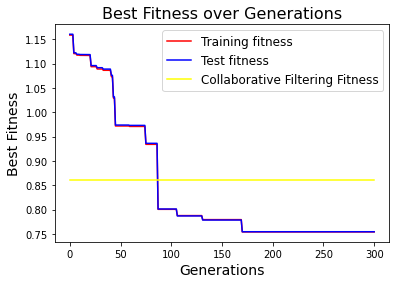

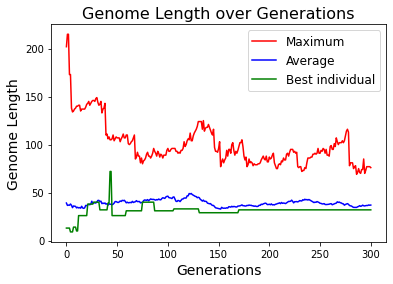

experiment 2
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(x[1],sub(add(add(x[1],add(x[3],x[6])),x[1]),sub(x[0],x[13])))

Training Fitness:  0.8173457007654927
Test Fitness:  0.8136136892586403
Depth:  7
Length of the genome:  33
Used portion of the genome: 0.39


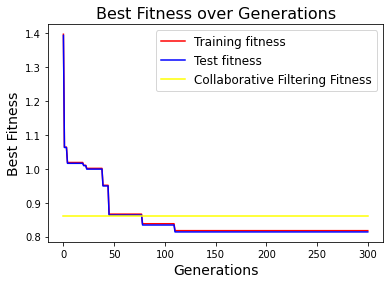

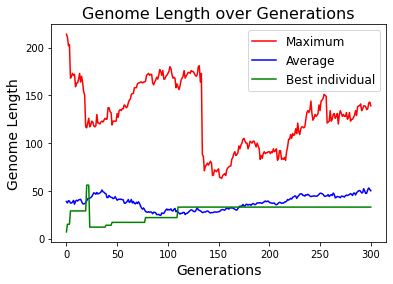

experiment 3
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(sub(x[6],x[10]),add(x[12],mul(05.14,x[1])))

Training Fitness:  0.7730956659214884
Test Fitness:  0.7722151644230701
Depth:  6
Length of the genome:  43
Used portion of the genome: 0.30


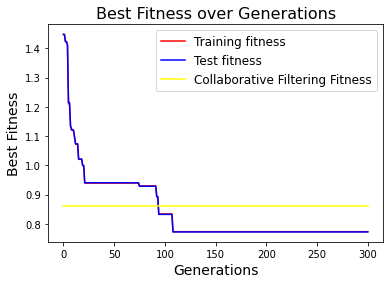

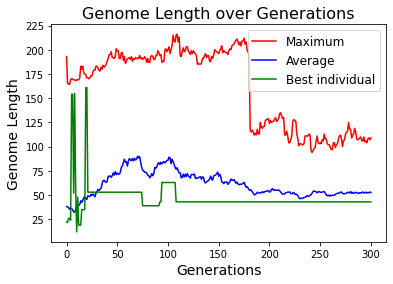

In [22]:
results = []
for i in range(3): 
    print("experiment " + str(i+1))
    data = ratings.copy(deep=True)
    print("*** splitting data ")
    X_train, X_test, Y_train, Y_test = split_data(data)
    print("*** finished splitting data ")
    print("*** grammatical evolution ")
    experiment_result = execute_grammatical_evolution(X_train, X_test, Y_train, Y_test);
    # results.append(experiment_result)

experiment 4
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(mul(05.29,x[1]),x[6])

Training Fitness:  0.7794593257971675
Test Fitness:  0.7816802031777487
Depth:  5
Length of the genome:  57
Used portion of the genome: 0.16


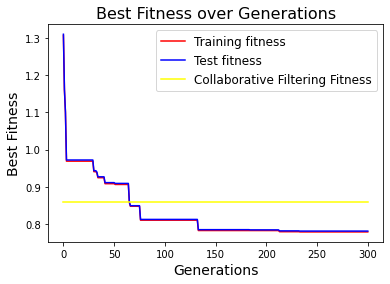

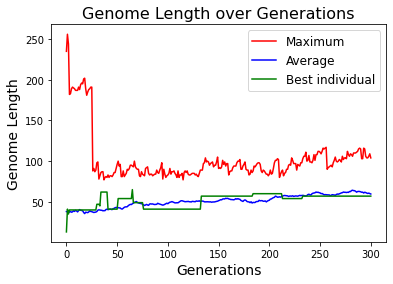

experiment 5
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(mul(sub(04.73,x[18]),x[1]),x[6])

Training Fitness:  0.8651915697024253
Test Fitness:  0.8655641536902351
Depth:  6
Length of the genome:  62
Used portion of the genome: 0.18


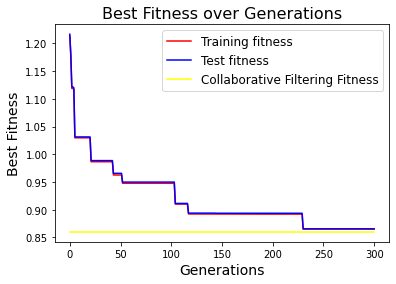

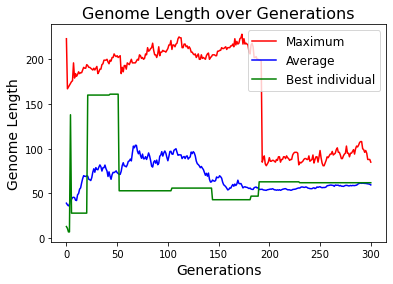

experiment 6
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(add(x[16],add(add(x[1],x[12]),add(x[13],x[1]))),x[1])

Training Fitness:  0.7931577860848574
Test Fitness:  0.7919616195790721
Depth:  6
Length of the genome:  17
Used portion of the genome: 0.65


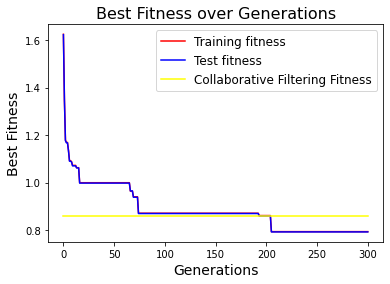

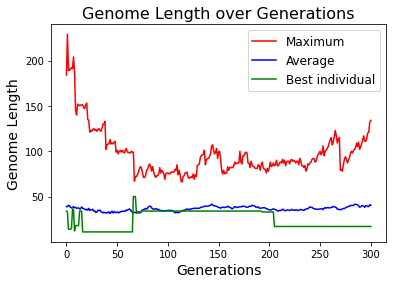

In [27]:
# results = []
index = 3
for i in range(3): 
    print("experiment " + str(index+i+1))
    data = ratings.copy(deep=True)
    print("*** splitting data ")
    X_train, X_test, Y_train, Y_test = split_data(data)
    print("*** finished splitting data ")
    print("*** grammatical evolution ")
    execute_grammatical_evolution(X_train, X_test, Y_train, Y_test);
    # results.append(experiment_result)

experiment 7
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(add(add(x[1],add(add(x[1],x[6]),x[1])),x[9]),x[16])

Training Fitness:  0.7728263842265279
Test Fitness:  0.770638406462522
Depth:  7
Length of the genome:  96
Used portion of the genome: 0.11


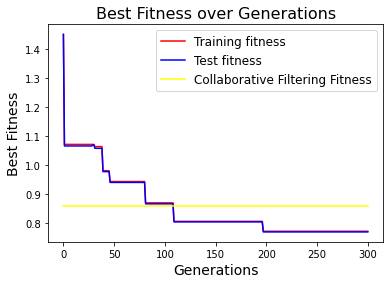

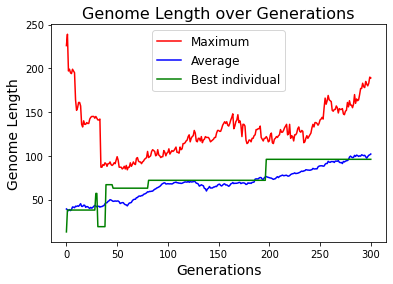

experiment 8
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(x[18],add(add(add(x[1],x[6]),x[9]),add(add(x[1],x[9]),x[1])))

Training Fitness:  0.7892951318264285
Test Fitness:  0.7893300218306117
Depth:  6
Length of the genome:  94
Used portion of the genome: 0.14


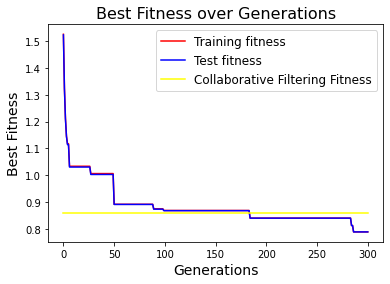

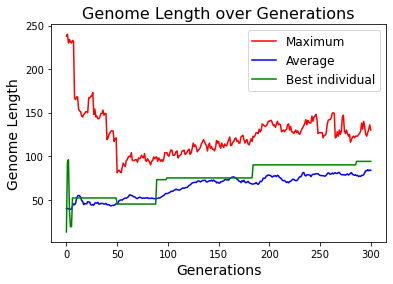

experiment 9
*** splitting data 
train (800167, 20)
test (200042, 20)
*** finished splitting data 
*** grammatical evolution 
* setting up grammar 
* preparing results 
Best individual: 
 add(mul(04.80,x[1]),x[13])

Training Fitness:  0.7715984174040414
Test Fitness:  0.7716789147352908
Depth:  5
Length of the genome:  91
Used portion of the genome: 0.10


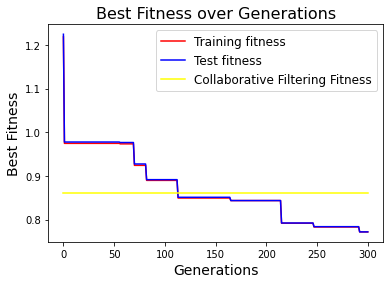

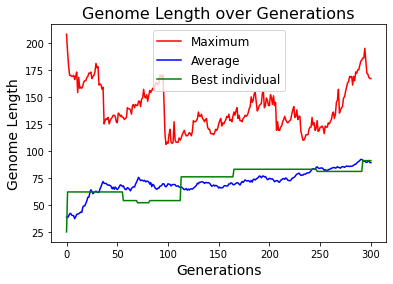

In [28]:
# results = []
index = 6
for i in range(3): 
    print("experiment " + str(index+i+1))
    data = ratings.copy(deep=True)
    print("*** splitting data ")
    X_train, X_test, Y_train, Y_test = split_data(data)
    print("*** finished splitting data ")
    print("*** grammatical evolution ")
    execute_grammatical_evolution(X_train, X_test, Y_train, Y_test);
    # results.append(experiment_result)

In [21]:
def split_data(data):
    data_train, data_test = train_test_split(data, test_size = 0.2)

    print('train ' + str(data_train.shape))
    print('test ' + str(data_test.shape))
    
    train_rows = len(data_train)
    test_rows = len(data_test)

    cols = len(data_train.columns)
    
    X_train = np.zeros([cols, train_rows], dtype=float)
    Y_train = np.zeros([train_rows, ], dtype = float)

    for i in range(cols-1): 
        for j in range(train_rows): 
            X_train[i,j] = data_train['x' + str(i+1)].iloc[j]
  
    for i in range(train_rows):
        Y_train[i] = data_train['y'].iloc[i]
    
    
    X_test = np.zeros([cols, test_rows], dtype=float)
    Y_test = np.zeros([test_rows, ], dtype=float)

    for i in range(cols-1): 
        for j in range(test_rows): 
            X_test[i,j] = data_test['x' + str(i+1)].iloc[j]
  
    for i in range(test_rows):
        Y_test[i] = data_test['y'].iloc[i]
        
    return X_train, X_test, Y_train, Y_test

## GE

In [25]:

def execute_grammatical_evolution(X_train, X_test, Y_train, Y_test):
    
    print("* setting up grammar ")
    # *************************** set up grammar ***************************
    GRAMMAR_FILE = 'rs-grammar-5.bnf'
    f = open("grammars/" + GRAMMAR_FILE, "r")
    # print(f.read())
    # f.close() 

    BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))
    
    # *************************** define variables ***************************
    POPULATION_SIZE = 1000
    MAX_GENERATIONS = 300
    P_CROSSOVER = 1
    P_MUTATION = 0.5
    ELITE_SIZE = round(0.01*POPULATION_SIZE)

    HALL_OF_FAME_SIZE = 1
    MAX_INIT_TREE_DEPTH = 10
    MIN_INIT_TREE_DEPTH = 1
    MAX_TREE_DEPTH = 17
    MAX_WRAPS = 0
    CODON_SIZE = 225
    
    # *************************** set up GE toolbox ***************************
    
    toolbox = base.Toolbox()

    # define a single objective, minimising fitness strategy:
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

    creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

    toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

    toolbox.register("evaluate", fitness_eval)

    # Tournament selection:
    toolbox.register("select", ge.selTournament, tournsize=7)

    # Single-point crossover:
    toolbox.register("mate", ge.crossover_onepoint)

    # Flip-int mutation:
    toolbox.register("mutate", ge.mutation_int_flip_per_codon)

    # *************************** perform grammatical evolution ***************************
    
    # create initial population (generation 0):
    population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                    bnf_grammar=BNF_GRAMMAR, 
                                    min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                    max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                    max_tree_depth=MAX_TREE_DEPTH, 
                                    max_wraps=MAX_WRAPS,
                                    codon_size=CODON_SIZE
                                    )

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    import math 
    # prepare the statistics object:
    #stats = tools.Statistics(key=lambda ind: ind.fitness.values if math.isnan(ind.fitness.values[0]) else None)#ind.fitness.values != np.inf else None)
    #stats = tools.Statistics(key=lambda ind: ind.fitness.values[0] if not math.isnan(ind.fitness.values[0]) else np.NaN)#ind.fitness.values != np.inf else None)
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)# if not ind.invalid else (np.NaN,))#ind.fitness.values != np.inf else None)
    stats.register("avg", np.nanmean)
    stats.register("std", np.nanstd)
    stats.register("min", np.nanmin)
    stats.register("max", np.nanmax)

    # perform the Grammatical Evolution flow:
    population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                        bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                        max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                        points_train=[X_train, Y_train], 
                                        points_test=[X_test, Y_test], 
                                        stats=stats, halloffame=hof, verbose=False)
    
    
    # *************************** statistics ***************************
    print("* preparing results ")
    max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
    min_fitness_values, std_fitness_values = logbook.select("min", "std")
    fitness_test = logbook.select("fitness_test")
    best_ind_length = logbook.select("best_ind_length")
    avg_length = logbook.select("avg_length")
    max_length = logbook.select("max_length")
    selection_time = logbook.select("selection_time")
    generation_time = logbook.select("generation_time")
    gen, invalid = logbook.select("gen", "invalid")

    # header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

    # results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
    #            columns = header)

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 10000)
    pd.set_option('display.colheader_justify', 'center')
    
    import textwrap
    best = hof.items[0].phenotype
    print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
    print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
    print("Test Fitness: ", fitness_eval(hof.items[0], [X_test,Y_test])[0])
    print("Depth: ", hof.items[0].depth)
    print("Length of the genome: ", len(hof.items[0].genome))
    print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')
    
    # *************************** plots ***************************

    # Extract statistics to plot graphs:

    collaborative_filtering = [] 
    for i in range(len(min_fitness_values)): 
        collaborative_filtering.append(0.86)

    plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
    plt.plot(gen, fitness_test, color='blue', label="Test fitness")
    plt.plot(gen, collaborative_filtering , color='yellow', label="Collaborative Filtering Fitness")
    plt.legend(fontsize=12)
    plt.xlabel('Generations', fontsize=14)
    plt.ylabel('Best Fitness', fontsize=14)
    plt.title('Best Fitness over Generations', fontsize=16)
    plt.show()
    
    
    plt.plot(gen, max_length, color='red', label="Maximum")
    plt.plot(gen, avg_length, color='blue', label="Average")
    plt.plot(gen, best_ind_length, color='green', label="Best individual")
    plt.legend(fontsize=12)
    plt.xlabel('Generations', fontsize=14)
    plt.ylabel('Genome Length', fontsize=14)
    plt.title('Genome Length over Generations', fontsize=16)
    plt.show()

    # return results;

In [13]:
def fitness_eval(individual, points):
    #points = [X, Y]
    x = points[0]
    y = points[1]
    # print('**************************X************************')
    # print(x)
    # print('**************************Y************************')

    # print(y)

    if individual.invalid == True:
        return np.NaN,

    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        # if(pred > 5): 
        #   pred = 5
        # if (pred < 0): 
        #   pred=0
        # fitness = np.mean(np.square(y - pred))
        fitness = np.sqrt(np.mean((pred-y)**2))
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError, ValueError):
        fitness = np.NaN
    # print('**************************pred************************')
    # print(pred)

    # print('**************************fit************************')
    # print(fitness)
    # print(fitness)
    if fitness == float("inf"):
      return np.NaN,    
    return fitness,

Best individual: 
 add(pdiv(x[13],x[13]),mul(x[1],04.85))

Training Fitness:  0.7446648337554759
Test Fitness:  0.7455308069222193
Depth:  5
Length of the genome:  107
Used portion of the genome: 0.10


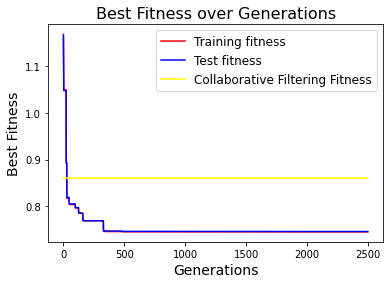

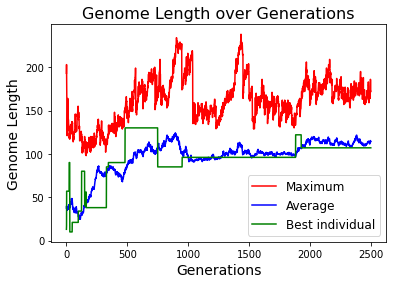

In [ ]:
# check correctness 


In [ ]:
#  add(add(x[1],sub(add(add(x[9],add(x[4],x[1])),x[13]),x[9])),add(x[6],x[1]))

# 3 * x[1] + x[13] + x[4] + x[6]

data_check = data_test.copy(deep=True)
# pred = 3 * data_check['x1'] + data_check['x13'] + data_check['x4'] + data_check['x6'] 
pred = 3 * data_check['x2'] + data_check['x14'] + data_check['x5'] + data_check['x7'] 
y = data_check['y']
rmse = np.sqrt(np.mean((pred-y)**2))
print(rmse)

In [34]:
# add(pdiv(x[13] /x[13]),mul(x[1],04.85))

# x[13]/x[13] + x[1] * 4.85

pdiv(0, 0)

# 1 + CF * 4.85

1.0

In [ ]:
# CBF : x1
# CF : x2
# is_favourite_genre : x3
# ML_rating : x4
# ML_votes : x5
# age_at_rating : x6
# age_at_release : x7
# born_before : x8
# gender : x9
# imdb_rating : x10
# imdb_votes : x11
# is_adult : x12
# runtime_minutes : x13
# is_english : x14
# budget : x15
# popularity : x16
# TMDB_rating : x17
# TMDB_votes : x18
# revenue : x19
